# Value iteration

In [3]:
import numpy as np

class ValueIteration:
    
    def __init__(self, states, actions, tpm, rewards, time_steps, discount=1.0):
        self.states = states
        self.actions = actions
        self.tpm = tpm
        self.rewards = rewards
        self.ts = time_steps
        self.discount = discount

        self.V = np.zeros((self.ts + 1, self.states))
        self.policy = np.zeros((self.ts, self.states), dtype=int)

    def value_iteration(self):
        for t in range(self.ts - 1, - 1, -1): #iteration backwards from t-1 to 0
            for s in range(self.states):
                q_vals = np.zeros(self.actions)
                for a in range(self.actions):
                    q_vals[a] = self.rewards[s, a] + self.discount * np.sum(self.tpm[s, a, :]*self.V[t + 1, :])
                    self.V[t, s] = np.min(q_vals)
                    self.policy[t, s] = np.argmin(q_vals)
                    return self.policy, self.V

In [5]:
min_inventory = -500
max_inventory = 200
num_states = max_inventory - min_inventory + 1  # Total states (701)
time_steps = 50
actions = 4         # e.g. possible order amounts: 0, 1, 2, 3
discount = 1.0
price = 1.0
a_cost = 1          # Holding cost coefficient when inventory is nonnegative
b_cost = 1          # Backlogging penalty coefficient when inventory is negative

def holding_cost(x):
    return a_cost * x if x >= 0 else -b_cost * x

# Build rewards matrix: dimensions (num_states x actions)
rewards = np.zeros((num_states, actions))
for i in range(num_states):
    x = i + min_inventory  # Convert index to actual inventory level
    for a in range(actions):
        rewards[i, a] = holding_cost(x) + price * a

# ----------------------------------------------------
# Build the transition probability matrix (TPM)
# ----------------------------------------------------
# Transition: S_{t+1} = S_t + A_t - W_t
# Here, W_t is drawn from a discrete uniform distribution over {0, 1, ..., 10}.



w_values = np.arange(0, 11)  # Demand values 0, 1, ..., 10
demand_probs = np.ones(len(w_values)) / len(w_values)  # Uniform probability for each demand value

# Initialize TPM: dimensions (num_states x actions x num_states)
tpm = np.zeros((num_states, actions, num_states))
for i in range(num_states):
    x = i + min_inventory  # current inventory level
    for act in range(actions):
        for w, p_w in zip(w_values, demand_probs):
            new_inventory = x + act - w
            # Clip the new_inventory to be within [min_inventory, max_inventory]
            new_inventory = max(min_inventory, min(new_inventory, max_inventory))
            j = new_inventory - min_inventory  # convert new_inventory to index
            tpm[i, act, j] += p_w

# --------------------------------
# Run Value Iteration
# --------------------------------
vi = ValueIteration(num_states, actions, tpm, rewards, time_steps, discount)
policy, V = vi.value_iteration()

print("Optimal policy at time 0 for each state (state index corresponds to inventory level index):")
print(policy[10])
print("\nValue function at time 0 for each state:")
print(V[10])

Optimal policy at time 0 for each state (state index corresponds to inventory level index):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0

In [9]:
import numpy as np

class ValueIteration:
    def __init__(self, num_states, actions, rewards, time_steps, discount=1.0, min_inventory=-500, max_inventory=200):
        self.num_states = num_states  # number of states
        self.actions = actions        # number of possible actions
        self.rewards = rewards        # reward matrix (num_states x actions)
        self.ts = time_steps          # number of time steps in the finite horizon
        self.discount = discount
        self.min_inventory = min_inventory
        self.max_inventory = max_inventory

        # Initialize value function array and policy array.
        # V has shape (time_steps+1, num_states), policy has shape (time_steps, num_states)
        self.V = np.zeros((self.ts + 1, self.num_states))
        self.policy = np.zeros((self.ts, self.num_states), dtype=int)

    def value_iteration(self):
        # Iterate backwards from the second-to-last time step down to time 0.
        for t in range(self.ts - 1, -1, -1):
            for s in range(self.num_states):
                q_vals = np.zeros(self.actions)
                for a in range(self.actions):
                    # Sample a random demand (discrete uniform between 0 and 10)
                    # Use randint which gives an integer from 0 to 10 (inclusive)
                    w = np.random.randint(0, 11)
                    
                    # Current inventory level corresponding to state index s.
                    current_inventory = s + self.min_inventory
                    
                    # Compute new inventory level after ordering a and subtracting demand w.
                    new_inventory = current_inventory + a - w
                    
                    # Clip new_inventory to lie within the allowed bounds.
                    new_inventory = max(self.min_inventory, min(new_inventory, self.max_inventory))
                    
                    # Convert new_inventory back to an index.
                    new_index = new_inventory - self.min_inventory
                    
                    # Compute Q-value: immediate reward plus discounted future value.
                    q_vals[a] = self.rewards[s, a] + self.discount * self.V[t + 1, new_index]
                
                # For a cost minimization problem, we choose the action with the smallest Q-value.
                self.V[t, s] = np.min(q_vals)
                self.policy[t, s] = np.argmin(q_vals)
        return self.policy, self.V

# ---------------------------
# Inventory system parameters
# ---------------------------
min_inventory = -500
max_inventory = 200
num_states = max_inventory - min_inventory + 1  # Total number of states.
time_steps = 50
actions = 4         # Possible order amounts: 0, 1, 2, 3.
discount = 1.0
price = 1.0
a_cost = 1          # Holding cost coefficient when inventory is nonnegative.
b_cost = 1          # Backlogging penalty coefficient when inventory is negative.

def holding_cost(x):
    return a_cost * x if x >= 0 else -b_cost * x

# Build rewards matrix: dimensions (num_states x actions)
# Each reward is the holding (or backlogging) cost plus the cost of ordering.
rewards = np.zeros((num_states, actions))
for i in range(num_states):
    x = i + min_inventory  # Convert state index to actual inventory level.
    for a in range(actions):
        rewards[i, a] = holding_cost(x) + price * a

# --------------------------------
# Run Value Iteration without TPM
# --------------------------------
vi = ValueIteration(num_states, actions, rewards, time_steps, discount, min_inventory, max_inventory)
policy, V = vi.value_iteration()

print("Optimal policy at time 0 for each state:")
print(policy[0])
print("\nValue function at time 0 for each state:")
print(V[0])


Optimal policy at time 0 for each state:
[0 0 0 0 2 0 2 0 1 3 2 1 0 3 3 3 2 1 2 3 3 1 3 1 0 1 3 0 0 2 1 3 1 2 0 2 1
 1 0 3 1 3 2 2 2 3 0 2 3 0 2 1 1 2 1 3 3 0 2 0 0 0 0 0 3 3 3 1 1 0 3 0 1 0
 3 1 1 3 1 3 2 3 3 1 3 1 0 2 0 2 3 3 3 3 3 3 3 1 2 3 1 1 2 2 3 0 2 3 2 3 0
 3 3 3 3 1 3 1 0 3 3 2 3 2 3 3 0 2 2 3 1 2 2 3 2 1 3 2 3 3 2 0 2 3 3 2 1 2
 0 1 3 0 3 3 2 1 2 3 1 2 1 0 1 1 1 3 3 3 3 0 1 2 1 1 1 3 1 0 0 3 2 1 3 2 2
 3 2 2 2 0 0 2 0 2 3 2 3 2 3 3 0 3 3 0 2 3 3 1 2 2 0 1 3 2 3 1 3 1 2 1 1 3
 0 2 0 3 3 2 3 3 1 2 1 2 3 2 1 0 0 0 2 0 1 3 2 3 3 3 3 2 1 1 3 0 2 2 3 0 2
 2 3 3 1 2 1 2 2 2 0 3 0 3 0 0 3 1 0 3 0 2 3 1 3 3 1 0 3 1 2 0 3 0 0 3 0 2
 0 3 2 2 3 3 2 0 1 2 2 0 1 3 1 1 1 2 0 0 1 0 1 3 1 1 1 2 1 3 3 0 3 0 3 3 1
 1 2 0 0 1 3 2 1 3 3 2 3 2 2 2 3 1 2 0 1 3 3 3 3 1 2 3 1 3 3 3 3 2 2 1 1 1
 2 2 3 2 2 3 2 0 0 3 2 3 0 1 0 1 1 0 1 3 2 0 2 2 0 3 3 1 0 0 2 0 3 1 2 1 2
 3 2 3 3 0 1 0 2 2 2 1 1 3 2 3 3 2 3 1 3 3 2 3 1 3 3 0 2 1 1 0 3 1 3 1 1 0
 3 2 2 1 0 2 2 3 1 0 0 2 2 1 3 1 3 3 3 1 1 3 0 0 3 1 2 3 2 

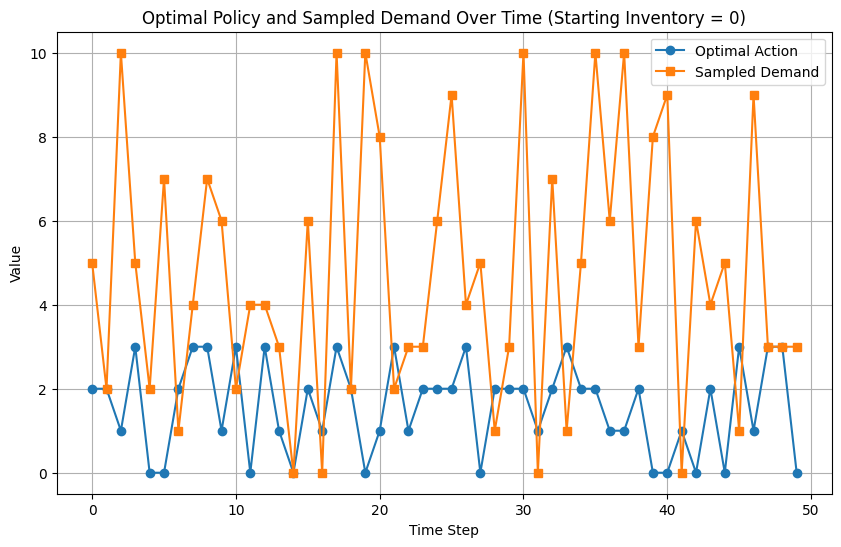

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Define ValueIteration Class
# ---------------------------
class ValueIteration:
    def __init__(self, num_states, actions, rewards, time_steps, discount=1.0, min_inventory=-500, max_inventory=200):
        self.num_states = num_states  # number of states
        self.actions = actions        # number of possible actions
        self.rewards = rewards        # reward matrix (num_states x actions)
        self.ts = time_steps          # number of time steps in the finite horizon
        self.discount = discount
        self.min_inventory = min_inventory
        self.max_inventory = max_inventory

        # Initialize value function array (time_steps+1 x num_states)
        self.V = np.zeros((self.ts + 1, self.num_states))
        # Initialize policy array (time_steps x num_states)
        self.policy = np.zeros((self.ts, self.num_states), dtype=int)

    def value_iteration(self):
        # Iterate backwards in time
        for t in range(self.ts - 1, -1, -1):
            for s in range(self.num_states):
                q_vals = np.zeros(self.actions)
                for a in range(self.actions):
                    # Sample a random demand (discrete uniform between 0 and 10)
                    w = np.random.randint(0, 11)
                    # Current inventory level corresponding to state index s
                    current_inventory = s + self.min_inventory
                    # Compute new inventory level after ordering 'a' and subtracting demand 'w'
                    new_inventory = current_inventory + a - w
                    # Clip new_inventory within allowed bounds
                    new_inventory = max(self.min_inventory, min(new_inventory, self.max_inventory))
                    # Convert new_inventory back to an index
                    new_index = new_inventory - self.min_inventory
                    # Compute Q-value: immediate reward plus discounted future value.
                    q_vals[a] = self.rewards[s, a] + self.discount * self.V[t + 1, new_index]
                # Choose the action that minimizes cost (for cost minimization)
                self.V[t, s] = np.min(q_vals)
                self.policy[t, s] = np.argmin(q_vals)
        return self.policy, self.V

# ---------------------------
# Inventory System Parameters
# ---------------------------
min_inventory = -500
max_inventory = 200
num_states = max_inventory - min_inventory + 1  # Total number of states
time_steps = 50
actions = 4         # e.g., possible order amounts: 0, 1, 2, 3
discount = 1.0
price = 1.0
a_cost = 1          # Holding cost coefficient (if inventory is nonnegative)
b_cost = 1          # Backlogging penalty coefficient (if inventory is negative)

def holding_cost(x):
    return a_cost * x if x >= 0 else -b_cost * x

# Build rewards matrix: dimensions (num_states x actions)
rewards = np.zeros((num_states, actions))
for i in range(num_states):
    x = i + min_inventory  # Convert state index to actual inventory level
    for a in range(actions):
        rewards[i, a] = holding_cost(x) + price * a

# --------------------------------
# Run Value Iteration
# --------------------------------
vi = ValueIteration(num_states, actions, rewards, time_steps, discount, min_inventory, max_inventory)
policy, V = vi.value_iteration()

# --------------------------------
# Simulation: Follow the Optimal Policy starting from inventory 0
# --------------------------------
# For inventory 0, compute the corresponding state index.
starting_inventory = 0
current_state = starting_inventory - min_inventory  # e.g., 0 - (-500) = 500

# Lists to store the optimal action and demand at each time step
optimal_actions = []
demand_samples = []

# For each time step, determine the optimal action, sample demand, and update the state.
current_inventory = starting_inventory  # actual inventory level
for t in range(time_steps):
    # Get the optimal action for the current state at time t
    action = policy[t, current_state]
    optimal_actions.append(action)
    
    # Sample demand from a uniform distribution between 0 and 10 (inclusive)
    demand = np.random.randint(0, 11)
    demand_samples.append(demand)
    
    # Update the inventory level: new_inventory = current_inventory + action - demand
    new_inventory = current_inventory + action - demand
    # Clip new_inventory within the allowed bounds
    new_inventory = max(min_inventory, min(new_inventory, max_inventory))
    
    # Update current state and current_inventory
    current_inventory = new_inventory
    current_state = new_inventory - min_inventory

# --------------------------------
# Plot the optimal policy and sampled demand over time
# --------------------------------
plt.figure(figsize=(10, 6))
plt.plot(range(time_steps), optimal_actions, marker='o', label='Optimal Action')
plt.plot(range(time_steps), demand_samples, marker='s', label='Sampled Demand')
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("Optimal Policy and Sampled Demand Over Time (Starting Inventory = 0)")
plt.legend()
plt.grid(True)
plt.show()


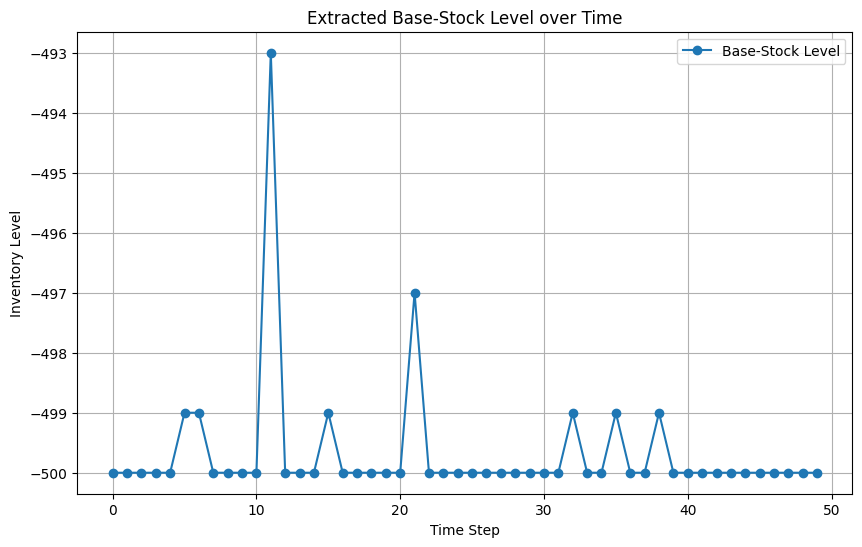

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Define ValueIteration Class
# ---------------------------
class ValueIteration:
    def __init__(self, num_states, actions, rewards, time_steps, discount=1.0, min_inventory=-500, max_inventory=200):
        self.num_states = num_states  # number of states
        self.actions = actions        # number of possible actions
        self.rewards = rewards        # reward matrix (num_states x actions)
        self.ts = time_steps          # number of time steps in the finite horizon
        self.discount = discount
        self.min_inventory = min_inventory
        self.max_inventory = max_inventory

        # Initialize value function array (time_steps+1 x num_states)
        self.V = np.zeros((self.ts + 1, self.num_states))
        # Initialize policy array (time_steps x num_states)
        self.policy = np.zeros((self.ts, self.num_states), dtype=int)

    def value_iteration(self):
        # Iterate backwards in time
        for t in range(self.ts - 1, -1, -1):
            for s in range(self.num_states):
                q_vals = np.zeros(self.actions)
                for a in range(self.actions):
                    # Sample a random demand (discrete uniform between 0 and 10)
                    w = np.random.randint(0, 11)
                    # Current inventory level corresponding to state index s
                    current_inventory = s + self.min_inventory
                    # Compute new inventory level after ordering 'a' and subtracting demand 'w'
                    new_inventory = current_inventory + a - w
                    # Clip new_inventory within allowed bounds
                    new_inventory = max(self.min_inventory, min(new_inventory, self.max_inventory))
                    # Convert new_inventory back to an index
                    new_index = new_inventory - self.min_inventory
                    # Compute Q-value: immediate reward plus discounted future value.
                    q_vals[a] = self.rewards[s, a] + self.discount * self.V[t + 1, new_index]
                # Choose the action that minimizes cost (assuming a cost minimization problem)
                self.V[t, s] = np.min(q_vals)
                self.policy[t, s] = np.argmin(q_vals)
        return self.policy, self.V

# ---------------------------
# Inventory System Parameters
# ---------------------------
min_inventory = -500
max_inventory = 200
num_states = max_inventory - min_inventory + 1  # Total number of states
time_steps = 50
actions = 4         # For example, possible order amounts: 0, 1, 2, 3
discount = 1.0
price = 1.0
a_cost = 1          # Holding cost coefficient when inventory is nonnegative
b_cost = 1          # Backlogging penalty coefficient when inventory is negative

def holding_cost(x):
    return a_cost * x if x >= 0 else -b_cost * x

# Build rewards matrix: dimensions (num_states x actions)
rewards = np.zeros((num_states, actions))
for i in range(num_states):
    x = i + min_inventory  # Convert state index to actual inventory level
    for a in range(actions):
        rewards[i, a] = holding_cost(x) + price * a

# --------------------------------
# Run Value Iteration
# --------------------------------
vi = ValueIteration(num_states, actions, rewards, time_steps, discount, min_inventory, max_inventory)
policy, V = vi.value_iteration()

# --------------------------------
# Extract Base-Stock Levels from the Policy
# --------------------------------
def extract_base_stock_levels(policy, min_inventory):
    """
    For each time period, extract the base-stock level.
    This is defined as the lowest inventory level for which the optimal action is 0.
    """
    time_steps, num_states = policy.shape
    base_stock_levels = np.empty(time_steps)
    
    for t in range(time_steps):
        # Find the first state (lowest inventory) where the optimal action is 0.
        idx = np.where(policy[t, :] == 0)[0]
        if idx.size > 0:
            # Use the first occurrence: inventory = index + min_inventory
            base_stock_levels[t] = idx[0] + min_inventory
        else:
            # If no state has action 0, then assume the base-stock level is at the max inventory
            base_stock_levels[t] = num_states - 1 + min_inventory
    return base_stock_levels

base_stock_levels = extract_base_stock_levels(policy, min_inventory)

# --------------------------------
# Plot the Base-Stock Level over Time
# --------------------------------
plt.figure(figsize=(10, 6))
plt.plot(range(time_steps), base_stock_levels, marker='o', label="Base-Stock Level")
plt.xlabel("Time Step")
plt.ylabel("Inventory Level")
plt.title("Extracted Base-Stock Level over Time")
plt.legend()
plt.grid(True)
plt.show()


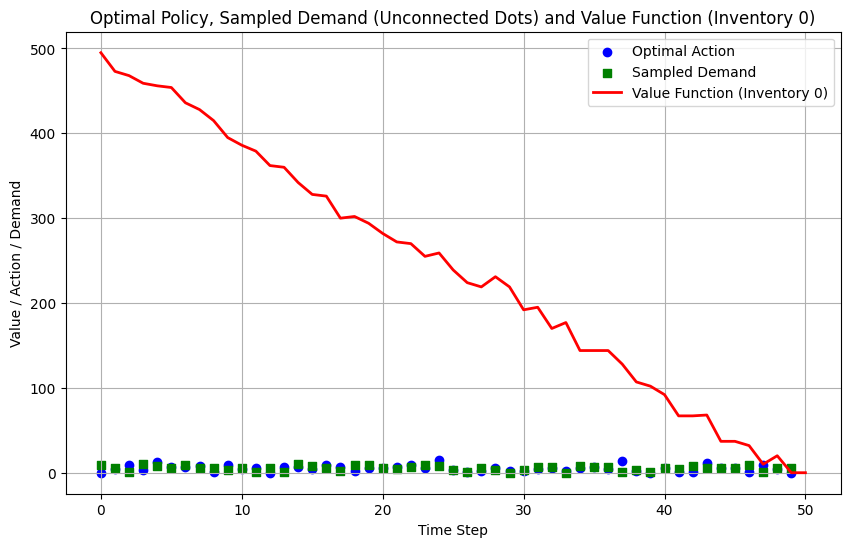

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Define ValueIteration Class
# ---------------------------
class ValueIteration:
    def __init__(self, num_states, actions, rewards, time_steps, discount=1.0, min_inventory=-500, max_inventory=200):
        self.num_states = num_states  # number of states
        self.actions = actions        # number of possible actions
        self.rewards = rewards        # reward matrix (num_states x actions)
        self.ts = time_steps          # number of time steps in the finite horizon
        self.discount = discount
        self.min_inventory = min_inventory
        self.max_inventory = max_inventory

        # Initialize value function array (time_steps+1 x num_states)
        self.V = np.zeros((self.ts + 1, self.num_states))
        # Initialize policy array (time_steps x num_states)
        self.policy = np.zeros((self.ts, self.num_states), dtype=int)

    def value_iteration(self):
        # Iterate backwards in time
        for t in range(self.ts - 1, -1, -1):
            for s in range(self.num_states):
                q_vals = np.zeros(self.actions)
                for a in range(self.actions):
                    # Sample a random demand (discrete uniform between 0 and 10)
                    w = np.random.randint(0, 11)
                    # Current inventory level corresponding to state index s
                    current_inventory = s + self.min_inventory
                    # Compute new inventory level after ordering 'a' and subtracting demand 'w'
                    new_inventory = current_inventory + a - w
                    # Clip new_inventory within allowed bounds
                    new_inventory = max(self.min_inventory, min(new_inventory, self.max_inventory))
                    # Convert new_inventory back to an index
                    new_index = new_inventory - self.min_inventory
                    # Compute Q-value: immediate reward plus discounted future value.
                    q_vals[a] = self.rewards[s, a] + self.discount * self.V[t + 1, new_index]
                # Choose the action that minimizes cost (for cost minimization)
                self.V[t, s] = np.min(q_vals)
                self.policy[t, s] = np.argmin(q_vals)
        return self.policy, self.V

# ---------------------------
# Inventory System Parameters
# ---------------------------


time_steps = 50
actions = 50         # e.g., possible order amounts: 0, 1, 2, 3
discount = 1.0
price = 5.0
a_cost = 1          # Holding cost coefficient (if inventory is nonnegative)
b_cost = 5          # Backlogging penalty coefficient (if inventory is negative)

min_inventory = -time_steps*10
max_inventory = time_steps*actions

num_states = max_inventory - min_inventory + 1  # Total number of states


def holding_cost(x):
    return a_cost * x if x >= 0 else -b_cost * x

# Build rewards matrix: dimensions (num_states x actions)
rewards = np.zeros((num_states, actions))
for i in range(num_states):
    x = i + min_inventory  # Convert state index to actual inventory level
    for a in range(actions):
        rewards[i, a] = holding_cost(x) + price * a

# --------------------------------
# Run Value Iteration
# --------------------------------
vi = ValueIteration(num_states, actions, rewards, time_steps, discount, min_inventory, max_inventory)
policy, V = vi.value_iteration()

# --------------------------------
# Simulation: Follow the Optimal Policy starting from inventory 0
# --------------------------------
# For inventory 0, compute the corresponding state index.
starting_inventory = 0
current_state = starting_inventory - min_inventory  # e.g., 0 - (-500) = 500

# Lists to store the optimal action and demand at each time step
optimal_actions = []
demand_samples = []

# For each time step, determine the optimal action, sample demand, and update the state.
current_inventory = starting_inventory  # actual inventory level
for t in range(time_steps):
    # Get the optimal action for the current state at time t
    action = policy[t, current_state]
    optimal_actions.append(action)
    
    # Sample demand from a uniform distribution between 0 and 10 (inclusive)
    demand = np.random.randint(0, 11)
    demand_samples.append(demand)
    
    # Update the inventory level: new_inventory = current_inventory + action - demand
    new_inventory = current_inventory + action - demand
    # Clip new_inventory within the allowed bounds
    new_inventory = max(min_inventory, min(new_inventory, max_inventory))
    
    # Update current state and current_inventory
    current_inventory = new_inventory
    current_state = new_inventory - min_inventory

# --------------------------------
# Extract Value Function for Starting State (inventory 0)
# --------------------------------
# Inventory 0 corresponds to state index: 0 - min_inventory = 500.

starting_index = starting_inventory - min_inventory
value_function_start = V[:, starting_index]  # V has shape (time_steps+1, num_states)

# --------------------------------
# Plotting
# --------------------------------
plt.figure(figsize=(10, 6))

# Plot optimal actions and sampled demand as scatter points (unconnected dots)
plt.scatter(range(time_steps), optimal_actions, marker='o', color='blue', label='Optimal Action')
plt.scatter(range(time_steps), demand_samples, marker='s', color='green', label='Sampled Demand')

# Plot value function for starting state as a connected line
plt.plot(range(time_steps + 1), value_function_start, color='red', label='Value Function (Inventory 0)', linewidth=2)

plt.xlabel("Time Step")
plt.ylabel("Value / Action / Demand")
plt.title("Optimal Policy, Sampled Demand (Unconnected Dots) and Value Function (Inventory 0)")
plt.legend()
plt.grid(True)
plt.show()


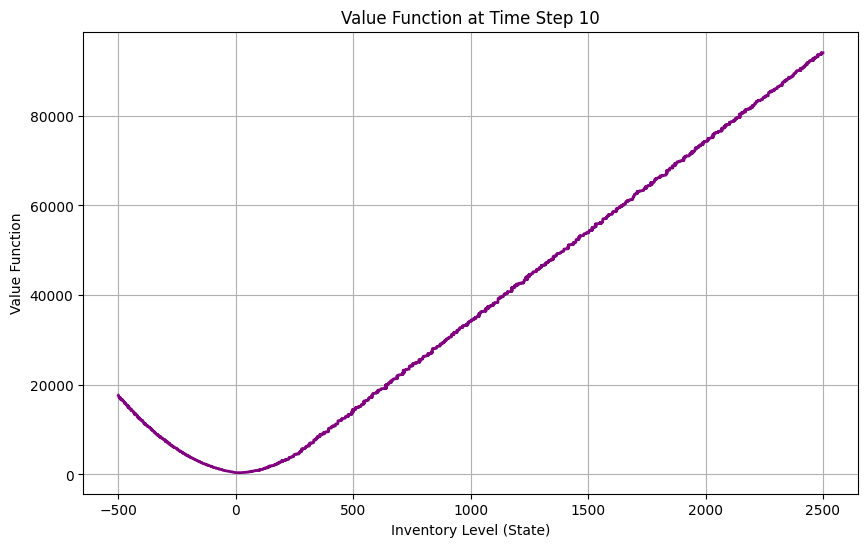

In [40]:
# Select a specific time step (e.g., the final time step)
t_plot = 10  # Change this to any time step of interest

# Extract value function for all states at time t_plot
value_function_t = V[t_plot, :]

# Convert state indices to actual inventory levels
inventory_levels = np.arange(min_inventory, max_inventory + 1)

# Plot value function for all states at time t_plot
plt.figure(figsize=(10, 6))
plt.plot(inventory_levels, value_function_t, color='purple', linewidth=2)

plt.xlabel("Inventory Level (State)")
plt.ylabel("Value Function")
plt.title(f"Value Function at Time Step {t_plot}")
plt.grid(True)
plt.show()


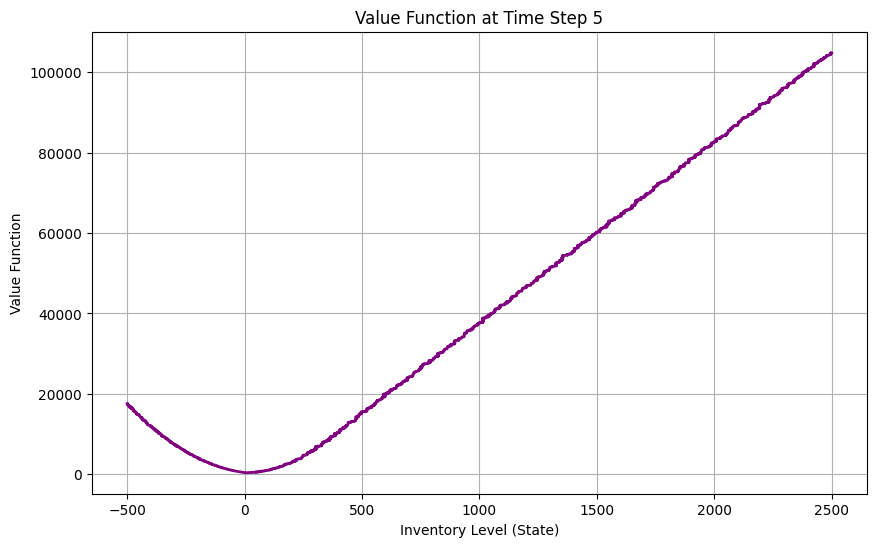

In [37]:
# Select a specific time step (e.g., the final time step)
t_plot = 5  # Change this to any time step of interest

# Extract value function for all states at time t_plot
value_function_t = V[t_plot, :]

# Convert state indices to actual inventory levels
inventory_levels = np.arange(min_inventory, max_inventory + 1)

# Plot value function for all states at time t_plot
plt.figure(figsize=(10, 6))
plt.plot(inventory_levels, value_function_t, color='purple', linewidth=2)

plt.xlabel("Inventory Level (State)")
plt.ylabel("Value Function")
plt.title(f"Value Function at Time Step {t_plot}")
plt.grid(True)
plt.show()


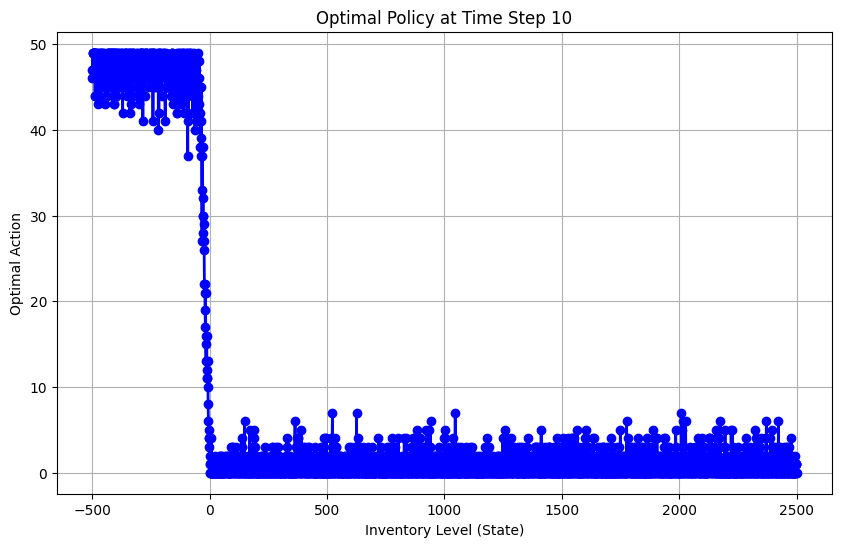

In [38]:
# Select a specific time step (same as before for consistency)
t_plot = 10  # Change this to any time step of interest

# Extract optimal policy for all states at time t_plot
optimal_policy_t = policy[t_plot, :]

# Convert state indices to actual inventory levels
inventory_levels = np.arange(min_inventory, max_inventory + 1)

# Plot the optimal policy for all states at time t_plot
plt.figure(figsize=(10, 6))
plt.plot(inventory_levels, optimal_policy_t, color='blue', linewidth=2, marker='o', linestyle='-')

plt.xlabel("Inventory Level (State)")
plt.ylabel("Optimal Action")
plt.title(f"Optimal Policy at Time Step {t_plot}")
plt.grid(True)
plt.show()


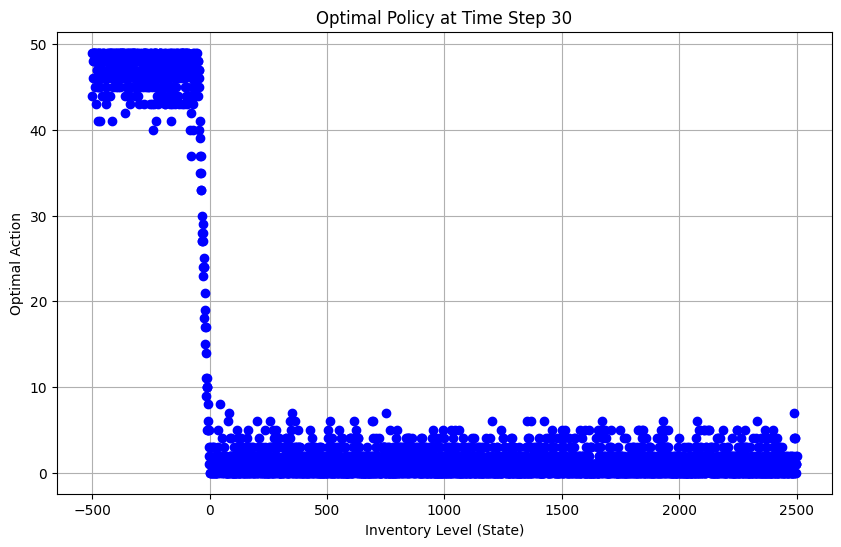

In [31]:
# Select a specific time step (same as before for consistency)
t_plot = 30  # Change this to any time step of interest

# Extract optimal policy for all states at time t_plot
optimal_policy_t = policy[t_plot, :]

# Convert state indices to actual inventory levels
inventory_levels = np.arange(min_inventory, max_inventory + 1)

# Plot the optimal policy for all states at time t_plot
plt.figure(figsize=(10, 6))
plt.plot(inventory_levels, optimal_policy_t, color='blue', marker='o', linestyle='None')

plt.xlabel("Inventory Level (State)")
plt.ylabel("Optimal Action")
plt.title(f"Optimal Policy at Time Step {t_plot}")
plt.grid(True)
plt.show()


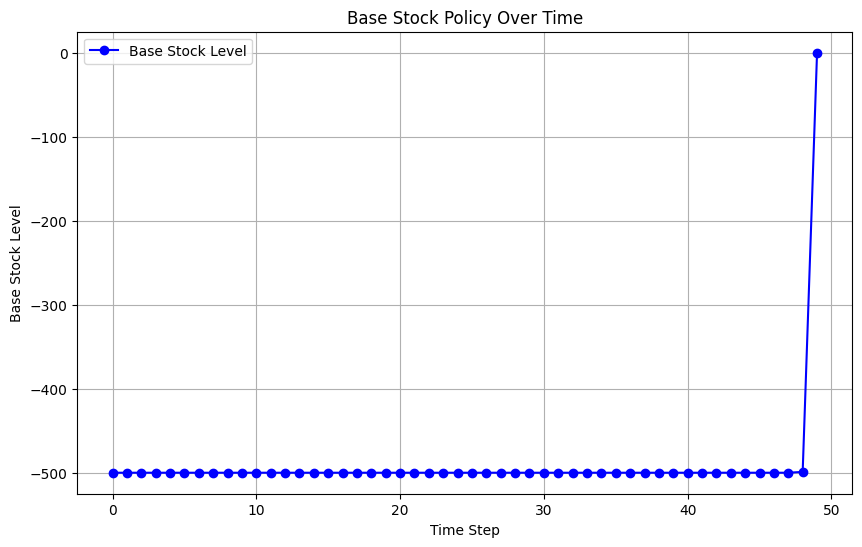

In [2]:
base_stock_levels = np.zeros(time_steps)
for t in range(time_steps):
    for s in range(num_states):
        if policy[t, s] > 0:  # The first inventory level where an order is placed
            base_stock_levels[t] = s + min_inventory
            break

# Plot the base-stock policy
plt.figure(figsize=(10, 6))
plt.plot(range(time_steps), base_stock_levels, marker='o', linestyle='-', color='blue', label='Base Stock Level')
plt.xlabel("Time Step")
plt.ylabel("Base Stock Level")
plt.title("Base Stock Policy Over Time")
plt.legend()
plt.grid(True)
plt.show()


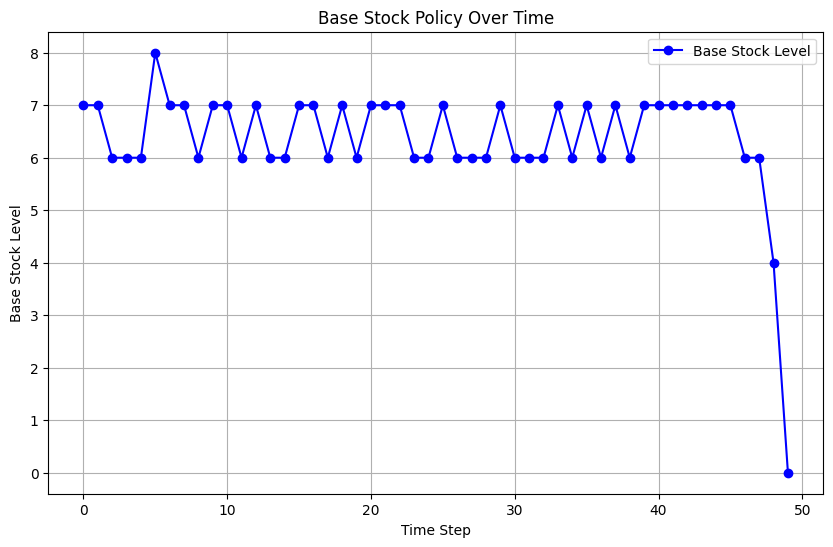

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def compute_base_stock_levels(V, time_steps, min_inventory, max_inventory, 
                              demand_values, demand_prob, holding_cost, discount, price, s=0):
    """
    Computes a single base-stock level sigma_t for each time step t for a given pre-decision state s.
    We solve:
      sigma_t = argmin_{z >= s} { price*(z-s) + H_t(z) },
    where H_t(z) = E[ h(z - W_t) + discount * V[t+1](z - W_t) ].
    """
    num_states = max_inventory - min_inventory + 1
    base_stocks = []

    for t in range(time_steps):
        H_t = np.zeros(num_states)
        
        # Compute H_t(z) for every feasible post-decision inventory level z.
        for zIndex in range(num_states):
            z = zIndex + min_inventory
            cost_sum = 0.0
            for w in demand_values:
                new_inventory = z - w
                new_inventory = max(min_inventory, min(new_inventory, max_inventory))
                new_index = new_inventory - min_inventory
                cost_sum += demand_prob * (holding_cost(new_inventory) + discount * V[t+1, new_index])
            H_t[zIndex] = cost_sum
        
        # Now, find sigma_t = argmin_{z >= s} { price*(z - s) + H_t(z) }.
        best_cost = float('inf')
        best_z = None
        for zIndex in range(num_states):
            z = zIndex + min_inventory
            if z >= s:
                order_cost = price * (z - s)
                total_cost = order_cost + H_t[zIndex]
                if total_cost < best_cost:
                    best_cost = total_cost
                    best_z = z
        base_stocks.append(best_z)
    return base_stocks

# Compute base-stock levels

demand_values = np.arange(0, 11)  # Possible demand values from 0 to 10
demand_prob = 1.0 / len(demand_values)  # Uniform probability distribution

base_stock_levels = compute_base_stock_levels(V, time_steps, min_inventory, max_inventory, 
                                              demand_values, demand_prob, holding_cost, discount, price)

# Plot the base-stock policy
plt.figure(figsize=(10, 6))
plt.plot(range(time_steps), base_stock_levels, marker='o', linestyle='-', color='blue', label='Base Stock Level')
plt.xlabel("Time Step")
plt.ylabel("Base Stock Level")
plt.title("Base Stock Policy Over Time")
plt.legend()
plt.grid(True)
plt.show()


### We can see that the base stock policy is going down to 0 at the end of the horizon. This is the expected result, as we dont want the agent to order stuff at the last day and then hold that. 

# Policy iteration

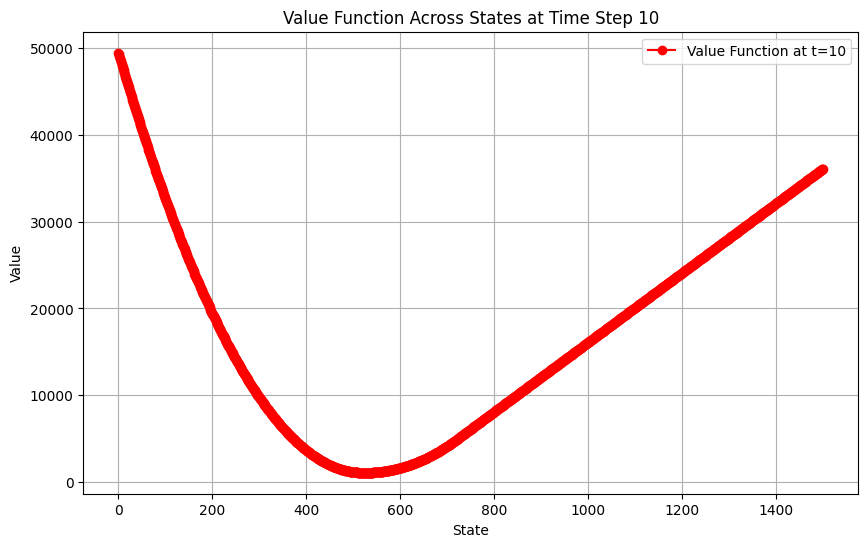

In [12]:
import numpy as np
import matplotlib.pyplot as plt

class PolicyIteration:
    def __init__(self, states, actions, rewards, time_steps, discount=1.0, min_inventory=-500, max_inventory=200):
        self.states = states
        self.actions = actions
        self.rewards = rewards
        self.ts = time_steps
        self.discount = discount
        self.min_inventory = min_inventory
        self.max_inventory = max_inventory

        self.policy = np.zeros((self.ts, self.states), dtype=int)
        self.V = np.zeros((self.ts + 1, self.states))
    
    def policy_evaluation(self):
        for t in range(self.ts - 1, -1, -1):  # Iterate backwards
            for s in range(self.states):
                a = self.policy[t, s]
                expected_value = 0
                for w in range(11):  # Demand values from 0 to 10
                    new_inventory = min(self.max_inventory, max(self.min_inventory, s + self.min_inventory + a - w))
                    new_index = new_inventory - self.min_inventory
                    expected_value += (1/11) * self.V[t + 1, new_index]
                self.V[t, s] = self.rewards[s, a] + self.discount * expected_value
    
    def policy_improvement(self):
        policy_stable = True
        for t in range(self.ts):
            for s in range(self.states):
                prev_act = self.policy[t, s]
                q_vals = np.zeros(self.actions)
                for a in range(self.actions):
                    expected_value = 0
                    for w in range(11):
                        new_inventory = min(self.max_inventory, max(self.min_inventory, s + self.min_inventory + a - w))
                        new_index = new_inventory - self.min_inventory
                        expected_value += (1/11) * self.V[t + 1, new_index]
                    q_vals[a] = self.rewards[s, a] + self.discount * expected_value
                best_act = np.argmin(q_vals)
                self.policy[t, s] = best_act
                if prev_act != best_act:
                    policy_stable = False
        return policy_stable
    
    def run(self):
        while True:
            self.policy_evaluation()
            if self.policy_improvement():
                break
        return self.policy, self.V

# Parameters
time_steps = 50
actions = 20  # Reduced to speed up execution
discount = 1.0
price = 5.0
a_cost = 1
b_cost = 5
min_inventory = -time_steps * 10
max_inventory = time_steps * actions
num_states = max_inventory - min_inventory + 1

def holding_cost(x):
    return a_cost * x if x >= 0 else -b_cost * x

# Reward Matrix
rewards = np.zeros((num_states, actions))
for s in range(num_states):
    x = s + min_inventory
    for a in range(actions):
        rewards[s, a] = holding_cost(x) + price * a

# Run Policy Iteration
pi = PolicyIteration(num_states, actions, rewards, time_steps, discount, min_inventory, max_inventory)
policy, V = pi.run()

# # Extract Base Stock Levels
# base_stock_levels = [policy[t, 0] for t in range(time_steps)]

# # Plot Base Stock Policy
# plt.figure(figsize=(10, 6))
# plt.plot(range(time_steps), base_stock_levels, marker='o', linestyle='-', color='blue', label='Base Stock Level')
# plt.xlabel("Time Step")
# plt.ylabel("Base Stock Level")
# plt.title("Base Stock Policy Over Time (Policy Iteration)")
# plt.legend()
# plt.grid(True)
# plt.show()

# Plot Value Function for a Certain Time Step
time_step_to_plot = 10  # Change this to any time step of interest
plt.figure(figsize=(10, 6))
plt.plot(range(num_states), V[time_step_to_plot, :], marker='o', linestyle='-', color='red', label=f'Value Function at t={time_step_to_plot}')
plt.xlabel("State")
plt.ylabel("Value")
plt.title(f"Value Function Across States at Time Step {time_step_to_plot}")
plt.legend()
plt.grid(True)
plt.show()


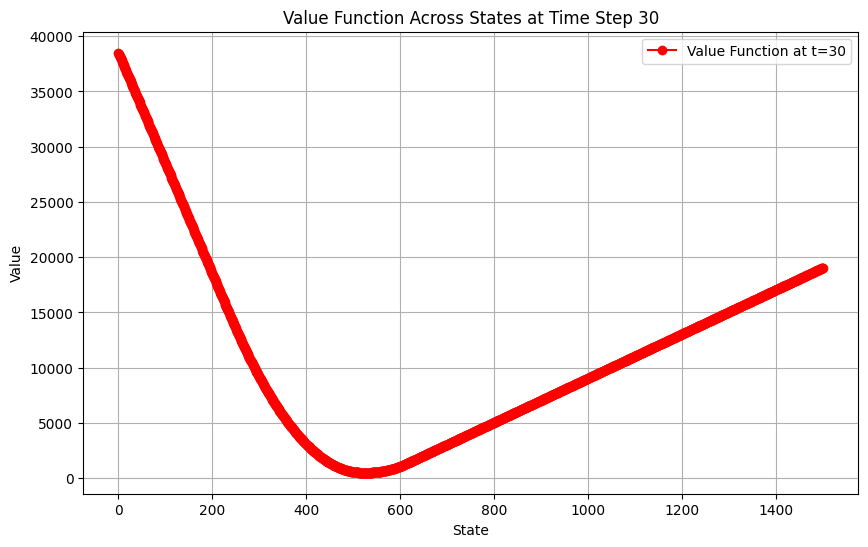

In [11]:
time_step_to_plot = 30  # Change this to any time step of interest
plt.figure(figsize=(10, 6))
plt.plot(range(num_states), V[time_step_to_plot, :], marker='o', linestyle='-', color='red', label=f'Value Function at t={time_step_to_plot}')
plt.xlabel("State")
plt.ylabel("Value")
plt.title(f"Value Function Across States at Time Step {time_step_to_plot}")
plt.legend()
plt.grid(True)
plt.show()

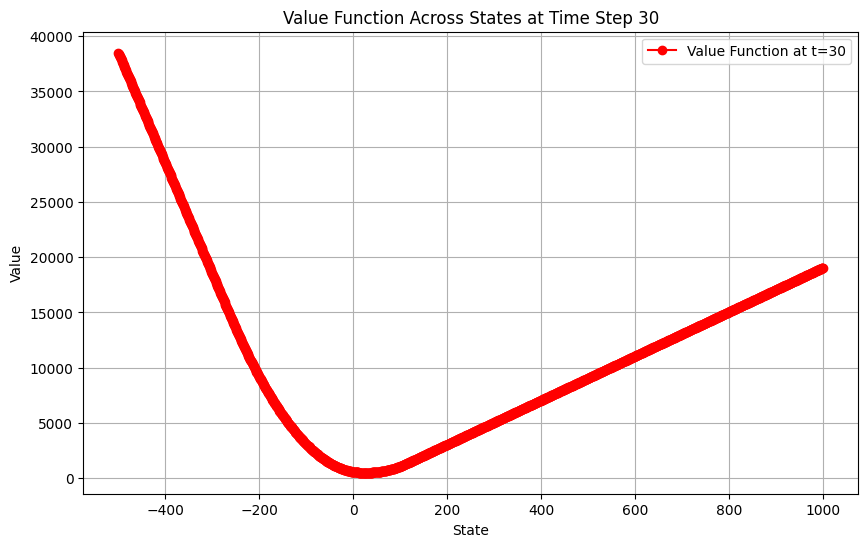

In [17]:
time_step_to_plot = 30  # Change this to any time step of interest
plt.figure(figsize=(10, 6))
x_values = list(range(-500, -500 + num_states))  # Generate x-values starting from -500
plt.plot(x_values, V[time_step_to_plot, :], marker='o', linestyle='-', color='red', label=f'Value Function at t={time_step_to_plot}')
plt.xlabel("State")
plt.ylabel("Value")
plt.title(f"Value Function Across States at Time Step {time_step_to_plot}")
plt.legend()
plt.grid(True)
plt.show()


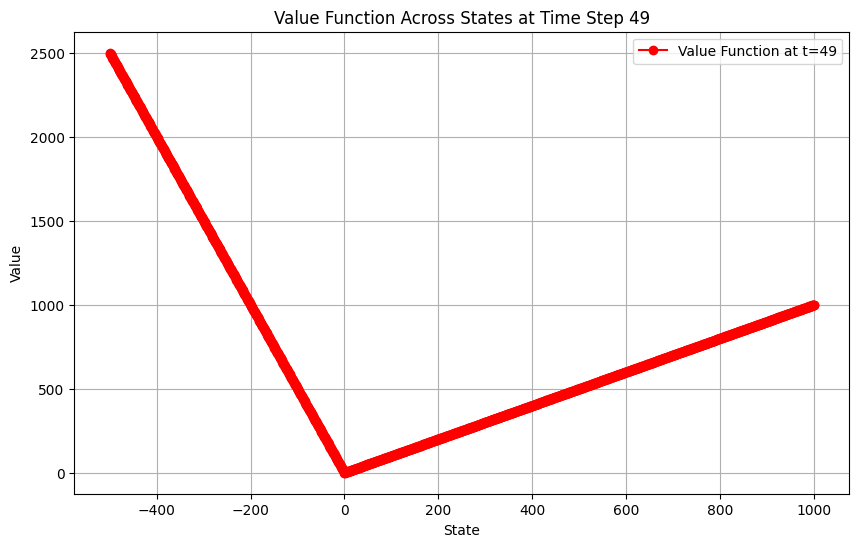

In [18]:
time_step_to_plot = 49  # Change this to any time step of interest
plt.figure(figsize=(10, 6))
x_values = list(range(-500, -500 + num_states))  # Generate x-values starting from -500
plt.plot(x_values, V[time_step_to_plot, :], marker='o', linestyle='-', color='red', label=f'Value Function at t={time_step_to_plot}')
plt.xlabel("State")
plt.ylabel("Value")
plt.title(f"Value Function Across States at Time Step {time_step_to_plot}")
plt.legend()
plt.grid(True)
plt.show()


## Policy

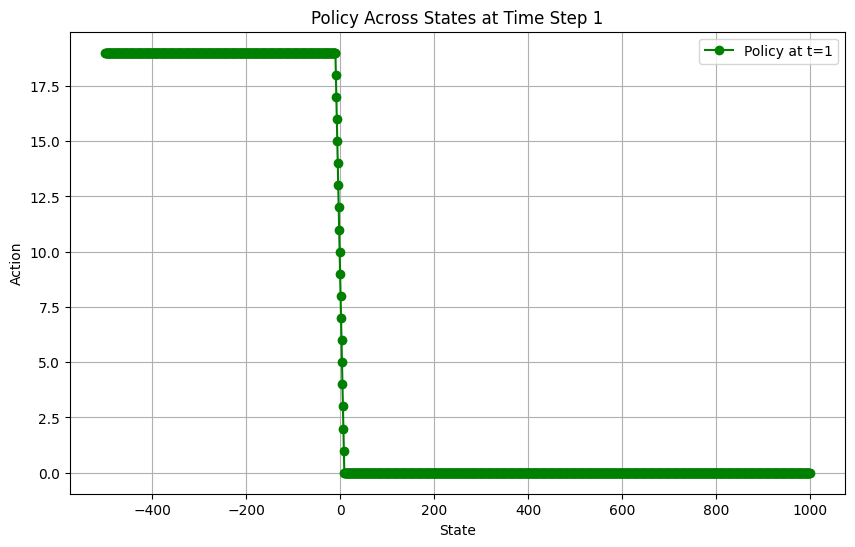

In [25]:
time_step_to_plot = 1  # Change this to any time step of interest
plt.figure(figsize=(10, 6))
x_values = list(range(-500, -500 + num_states))
plt.plot(x_values, policy[time_step_to_plot, :], marker='o', linestyle='-', color='green', label=f'Policy at t={time_step_to_plot}')
plt.xlabel("State")
plt.ylabel("Action")
plt.title(f"Policy Across States at Time Step {time_step_to_plot}")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
print(num_states)

1501


### Calculating the base stock policy

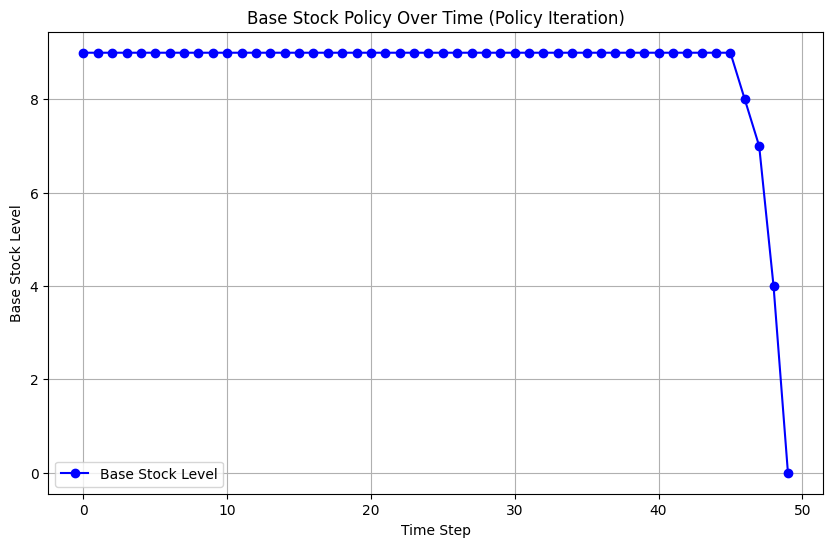

In [14]:

def compute_base_stock_levels(V, time_steps, min_inventory, max_inventory, demand_values, demand_prob, holding_cost, discount, price, s=0):
    """
    Computes a single base-stock level sigma_t for each time step t for a given pre-decision state s.
    """
    num_states = max_inventory - min_inventory + 1
    base_stocks = []
    
    for t in range(time_steps):
        H_t = np.zeros(num_states)
        
        # Compute H_t(z) for every feasible post-decision inventory level z.
        for zIndex in range(num_states):
            z = zIndex + min_inventory
            cost_sum = 0.0
            for w, prob in zip(demand_values, demand_prob):
                new_inventory = z - w
                new_inventory = max(min_inventory, min(new_inventory, max_inventory))
                new_index = new_inventory - min_inventory
                cost_sum += prob * (holding_cost(new_inventory) + discount * V[t+1, new_index])
            H_t[zIndex] = cost_sum
        
        # Now, find sigma_t = argmin_{z >= s} { price*(z - s) + H_t(z) }.
        best_cost = float('inf')
        best_z = None
        for zIndex in range(num_states):
            z = zIndex + min_inventory
            if z >= s:
                order_cost = price * (z - s)
                total_cost = order_cost + H_t[zIndex]
                if total_cost < best_cost:
                    best_cost = total_cost
                    best_z = z
        base_stocks.append(best_z)
    return base_stocks

demand_values = np.arange(0, 11)
demand_prob = np.ones(len(demand_values)) / len(demand_values)
base_stock_levels = compute_base_stock_levels(V, time_steps, min_inventory, max_inventory, demand_values, demand_prob, holding_cost, discount, price)

# Plot Base Stock Policy
plt.figure(figsize=(10, 6))
plt.plot(range(time_steps), base_stock_levels, marker='o', linestyle='-', color='blue', label='Base Stock Level')
plt.xlabel("Time Step")
plt.ylabel("Base Stock Level")
plt.title("Base Stock Policy Over Time (Policy Iteration)")
plt.legend()
plt.grid(True)
plt.show()


# Monte Carlo methods

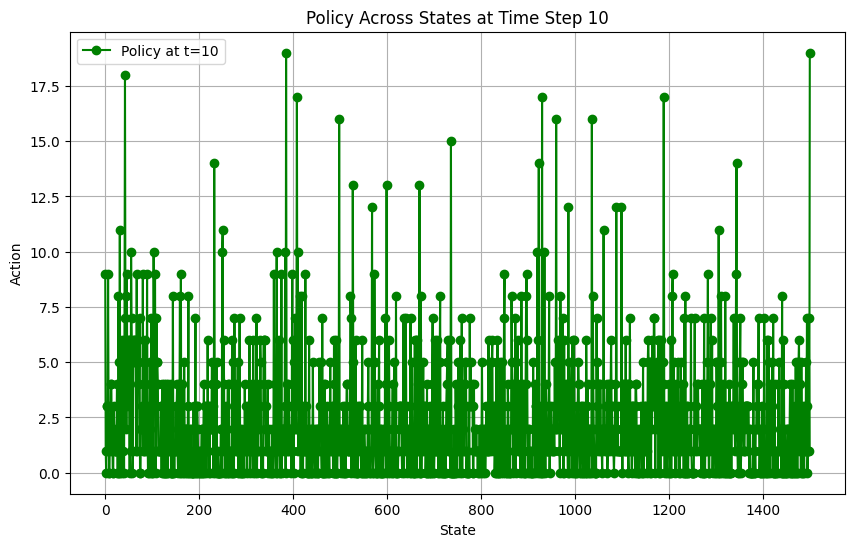

In [44]:
import numpy as np
import matplotlib.pyplot as plt

class MonteCarloPolicy:
    def __init__(self, states, actions, time_steps, discount=1.0, epsilon=0.1, min_inventory=-500, max_inventory=200):
        self.states = states
        self.actions = actions
        self.ts = time_steps
        self.discount = discount
        self.epsilon = epsilon
        self.min_inventory = min_inventory
        self.max_inventory = max_inventory
        
        self.policy = np.random.randint(0, actions, size=(self.ts, self.states))
        self.returns_count = np.zeros((self.ts, self.states, self.actions))
        self.Q = np.zeros((self.ts, self.states, self.actions))
    
    def generate_episode(self):
        episode = []
        state = np.random.randint(0, self.states)
        for t in range(self.ts):
            action = self.policy[t, state] if np.random.rand() > self.epsilon else np.random.randint(0, self.actions)
            demand = np.random.randint(0, 11)
            new_inventory = min(self.max_inventory, max(self.min_inventory, state + self.min_inventory + action - demand))
            new_state = new_inventory - self.min_inventory
            reward = -abs(state)
            episode.append((t, state, action, reward))
            state = new_state
        return episode
    
    def policy_evaluation(self, episodes=500):  # Reduced episodes for speed
        for _ in range(episodes):
            episode = self.generate_episode()
            G = 0
            visited = set()
            for t, s, a, r in reversed(episode):
                G = self.discount * G + r
                if (t, s, a) not in visited:
                    idx = (t, s, a)
                    self.returns_count[idx] += 1
                    self.Q[idx] += (G - self.Q[idx]) / self.returns_count[idx]
                    visited.add((t, s, a))
    
    def policy_improvement(self):
        self.policy = np.argmax(self.Q, axis=2)  # Vectorized update
    
    def run(self, iterations=500):  # Reduced iterations for faster execution
        for _ in range(iterations):
            self.policy_evaluation()
            self.policy_improvement()
        return self.policy, self.Q

# Parameters
time_steps = 50
actions = 20  # Reduced to speed up execution
discount = 1.0
epsilon = 0.1
min_inventory = -time_steps * 10
max_inventory = time_steps * actions
num_states = max_inventory - min_inventory + 1

# Run Monte Carlo Policy Iteration
mc = MonteCarloPolicy(num_states, actions, time_steps, discount, epsilon, min_inventory, max_inventory)
policy, Q = mc.run()

# Plot Policy for a Certain Time Step
time_step_to_plot = 10  # Change this to any time step of interest
plt.figure(figsize=(10, 6))
plt.plot(range(num_states), policy[time_step_to_plot, :], marker='o', linestyle='-', color='green', label=f'Policy at t={time_step_to_plot}')
plt.xlabel("State")
plt.ylabel("Action")
plt.title(f"Policy Across States at Time Step {time_step_to_plot}")
plt.legend()
plt.grid(True)
plt.show()


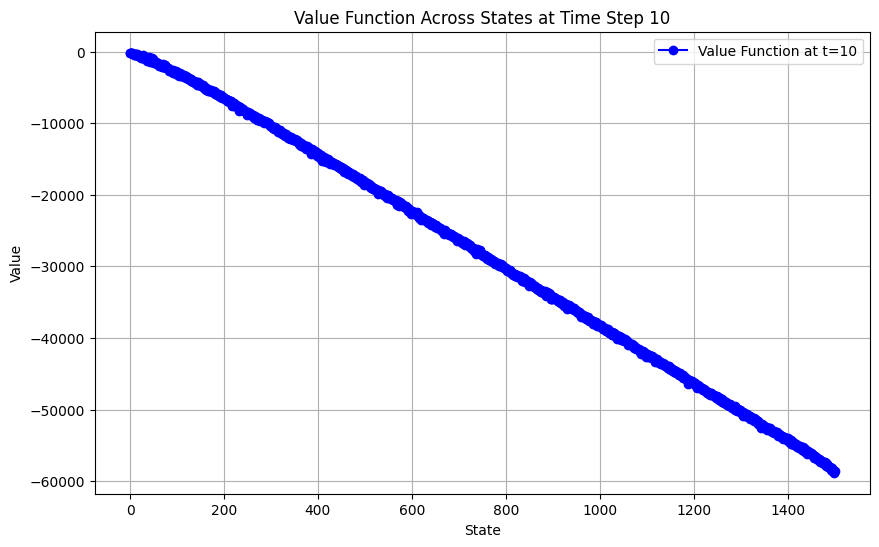

In [45]:
time_step_to_plot = 10

plt.figure(figsize=(10, 6))
plt.plot(range(num_states), np.max(Q[time_step_to_plot, :, :], axis=1), marker='o', linestyle='-', color='blue', label=f'Value Function at t={time_step_to_plot}')
plt.xlabel("State")
plt.ylabel("Value")
plt.title(f"Value Function Across States at Time Step {time_step_to_plot}")
plt.legend()
plt.grid(True)
plt.show()


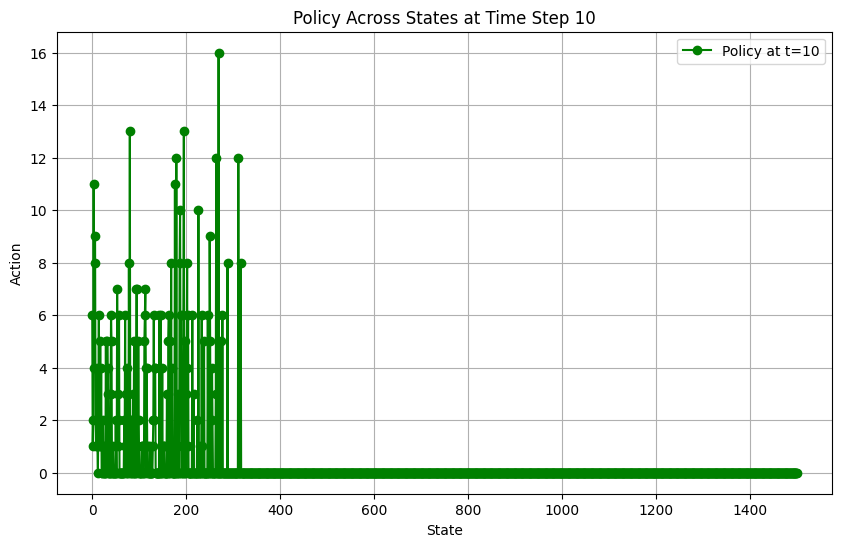

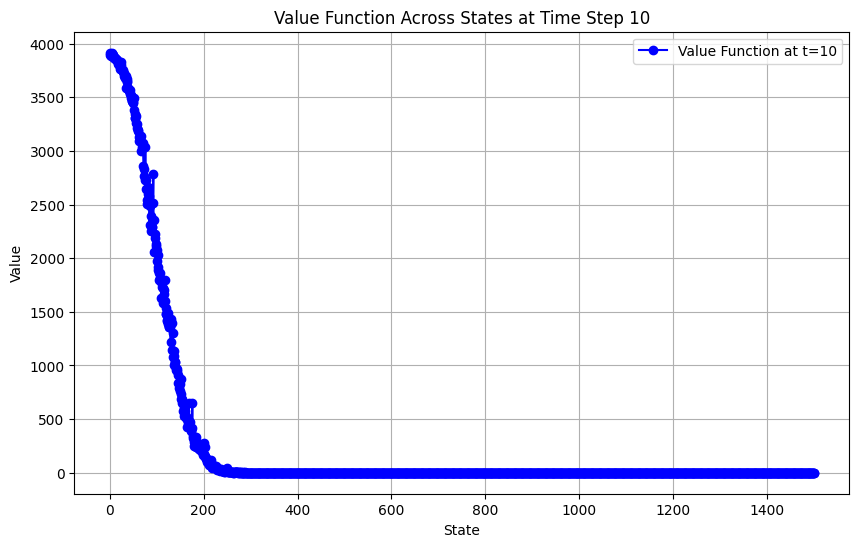

In [46]:
import numpy as np
import matplotlib.pyplot as plt

class MonteCarloPolicy:
    def __init__(self, states, actions, time_steps, discount=1.0, epsilon=0.1, min_inventory=-500, max_inventory=200):
        self.states = states
        self.actions = actions
        self.ts = time_steps
        self.discount = discount
        self.epsilon = epsilon
        self.min_inventory = min_inventory
        self.max_inventory = max_inventory
        
        self.policy = np.random.randint(0, actions, size=(self.ts, self.states))
        self.returns_count = np.zeros((self.ts, self.states, self.actions))
        self.Q = np.zeros((self.ts, self.states, self.actions))
    
    def generate_episode(self):
        episode = []
        state = np.random.randint(0, self.states)
        for t in range(self.ts):
            action = self.policy[t, state] if np.random.rand() > self.epsilon else np.random.randint(0, self.actions)
            demand = np.random.randint(0, 11)
            new_inventory = min(self.max_inventory, max(self.min_inventory, state + self.min_inventory + action - demand))
            new_state = new_inventory - self.min_inventory
            reward = max(0, 100 - abs(state))  # Reformulated to be positive
            episode.append((t, state, action, reward))
            state = new_state
        return episode
    
    def policy_evaluation(self, episodes=500):  # Reduced episodes for speed
        for _ in range(episodes):
            episode = self.generate_episode()
            G = 0
            visited = set()
            for t, s, a, r in reversed(episode):
                G = self.discount * G + r
                if (t, s, a) not in visited:
                    idx = (t, s, a)
                    self.returns_count[idx] += 1
                    self.Q[idx] += (G - self.Q[idx]) / self.returns_count[idx]
                    visited.add((t, s, a))
    
    def policy_improvement(self):
        self.policy = np.argmax(self.Q, axis=2)  # Vectorized update
    
    def run(self, iterations=500):  # Reduced iterations for faster execution
        for _ in range(iterations):
            self.policy_evaluation()
            self.policy_improvement()
        return self.policy, self.Q

# Parameters
time_steps = 50
actions = 20  # Reduced to speed up execution
discount = 1.0
epsilon = 0.1
min_inventory = -time_steps * 10
max_inventory = time_steps * actions
num_states = max_inventory - min_inventory + 1

# Run Monte Carlo Policy Iteration
mc = MonteCarloPolicy(num_states, actions, time_steps, discount, epsilon, min_inventory, max_inventory)
policy, Q = mc.run()

# Plot Policy for a Certain Time Step
time_step_to_plot = 10  # Change this to any time step of interest
plt.figure(figsize=(10, 6))
plt.plot(range(num_states), policy[time_step_to_plot, :], marker='o', linestyle='-', color='green', label=f'Policy at t={time_step_to_plot}')
plt.xlabel("State")
plt.ylabel("Action")
plt.title(f"Policy Across States at Time Step {time_step_to_plot}")
plt.legend()
plt.grid(True)
plt.show()

# Plot Value Function Across States
plt.figure(figsize=(10, 6))
plt.plot(range(num_states), np.max(Q[time_step_to_plot, :, :], axis=1), marker='o', linestyle='-', color='blue', label=f'Value Function at t={time_step_to_plot}')
plt.xlabel("State")
plt.ylabel("Value")
plt.title(f"Value Function Across States at Time Step {time_step_to_plot}")
plt.legend()
plt.grid(True)
plt.show()


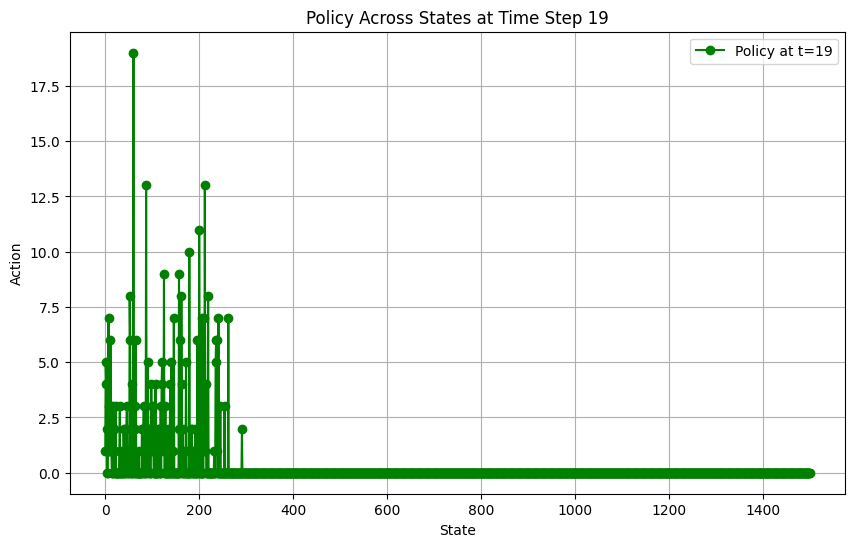

In [49]:
# Plot Policy for a Certain Time Step
time_step_to_plot = 19  # Change this to any time step of interest
plt.figure(figsize=(10, 6))
plt.plot(range(num_states), policy[time_step_to_plot, :], marker='o', linestyle='-', color='green', label=f'Policy at t={time_step_to_plot}')
plt.xlabel("State")
plt.ylabel("Action")
plt.title(f"Policy Across States at Time Step {time_step_to_plot}")
plt.legend()
plt.grid(True)
plt.show()


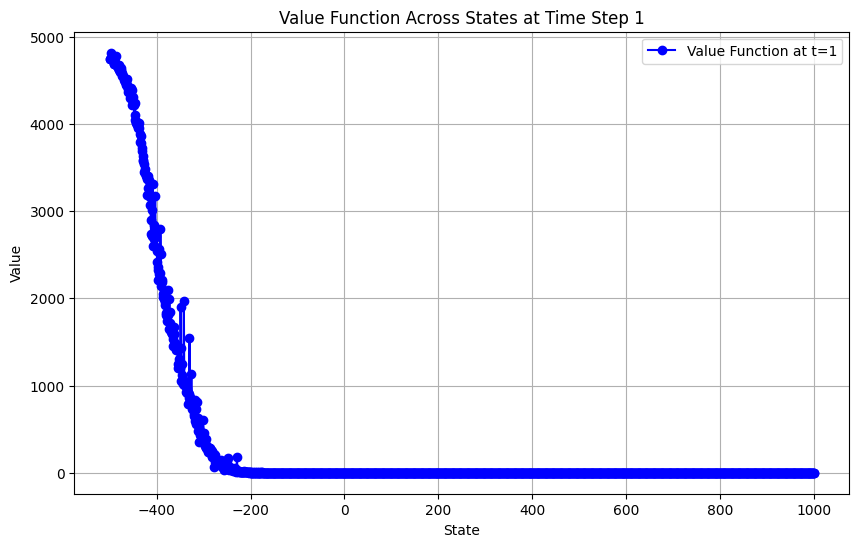

In [52]:
time_step_to_plot = 1
plt.figure(figsize=(10, 6))
x_values = list(range(-500, -500 + num_states))

plt.plot(x_values, np.max(Q[time_step_to_plot, :, :], axis=1), marker='o', linestyle='-', color='blue', label=f'Value Function at t={time_step_to_plot}')
plt.xlabel("State")
plt.ylabel("Value")
plt.title(f"Value Function Across States at Time Step {time_step_to_plot}")
plt.legend()
plt.grid(True)
plt.show()

In [53]:
import numpy as np
import matplotlib.pyplot as plt

class MonteCarloPolicy:
    def __init__(self, states, actions, time_steps, discount=1.0, epsilon=0.2, min_inventory=-500, max_inventory=200):
        self.states = states
        self.actions = actions
        self.ts = time_steps
        self.discount = discount
        self.epsilon = epsilon
        self.min_inventory = min_inventory
        self.max_inventory = max_inventory
        
        self.policy = np.random.randint(0, actions, size=(self.ts, self.states))
        self.returns_count = np.zeros((self.ts, self.states, self.actions))
        self.Q = np.zeros((self.ts, self.states, self.actions))
    
    def generate_episode(self):
        episode = []
        state = np.random.randint(0, self.states)
        for t in range(self.ts):
            action = self.policy[t, state] if np.random.rand() > self.epsilon else np.random.randint(0, self.actions)
            demand = np.random.randint(0, 11)
            new_inventory = min(self.max_inventory, max(self.min_inventory, state + self.min_inventory + action - demand))
            new_state = new_inventory - self.min_inventory
            reward = 100 - abs(state)  # Ensuring a reward scale that propagates well
            episode.append((t, state, action, reward))
            state = new_state
        return episode
    
    def policy_evaluation(self, episodes=1000):  # Increased episodes for better learning
        for _ in range(episodes):
            episode = self.generate_episode()
            G = 0
            visited = set()
            for t, s, a, r in reversed(episode):
                G = self.discount * G + r
                if (t, s, a) not in visited:
                    idx = (t, s, a)
                    self.returns_count[idx] += 1
                    self.Q[idx] += (G - self.Q[idx]) / self.returns_count[idx]
                    visited.add((t, s, a))
    
    def policy_improvement(self):
        self.policy = np.argmax(self.Q, axis=2)  # Vectorized update
    
    def run(self, iterations=1000):  # Increased iterations for better convergence
        for _ in range(iterations):
            self.policy_evaluation()
            self.policy_improvement()
        return self.policy, self.Q

# Parameters
time_steps = 50
actions = 20  # Reduced to speed up execution
discount = 1.0
epsilon = 0.2  # Increased for better exploration
min_inventory = -time_steps * 10
max_inventory = time_steps * actions
num_states = max_inventory - min_inventory + 1

# Run Monte Carlo Policy Iteration
mc = MonteCarloPolicy(num_states, actions, time_steps, discount, epsilon, min_inventory, max_inventory)
policy, Q = mc.run()

# Plot Policy for a Certain Time Step
time_step_to_plot = 10  # Change this to any time step of interest
plt.figure(figsize=(10, 6))
plt.plot(range(num_states), policy[time_step_to_plot, :], marker='o', linestyle='-', color='green', label=f'Policy at t={time_step_to_plot}')
plt.xlabel("State")
plt.ylabel("Action")
plt.title(f"Policy Across States at Time Step {time_step_to_plot}")
plt.legend()
plt.grid(True)
plt.show()

# Plot Value Function Across States
plt.figure(figsize=(10, 6))
plt.plot(range(num_states), np.max(Q[time_step_to_plot, :, :], axis=1), marker='o', linestyle='-', color='blue', label=f'Value Function at t={time_step_to_plot}')
plt.xlabel("State")
plt.ylabel("Value")
plt.title(f"Value Function Across States at Time Step {time_step_to_plot}")
plt.legend()
plt.grid(True)
plt.show()

KeyboardInterrupt: 